# Machine learning: La forma clásica

## Cargar datos y crear características básicas

In [15]:
# Import pandas
import pandas as pd

In [16]:
# Load data
df = pd.read_csv("data/attrition.csv")

In [17]:
# Show first 5 rows
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [18]:
# Dummy encoding
df = pd.get_dummies(df)

In [19]:
# Show first 5 rows
df.head()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1313919,41,1102,1,2,1,2,94,3,2,...,0,1,0,0,0,0,1,1,0,1
1,1200302,49,279,8,1,1,3,61,2,2,...,0,0,1,0,0,1,0,1,1,0
2,1060315,37,1373,2,2,1,4,92,2,1,...,0,1,0,0,0,0,1,1,0,1
3,1272912,33,1392,3,4,1,4,56,3,1,...,0,0,1,0,0,1,0,1,0,1
4,1414939,27,591,2,1,1,1,40,3,1,...,0,1,0,0,0,1,0,1,1,0


In [20]:
# Rename column attrition_yes to attrition
df.rename(columns={'Attrition_Yes': 'Attrition'}, inplace=True)

In [21]:
# Drop column Attrition_no
df = df.drop(columns=['Attrition_No'])

In [61]:
# Drop employee id
df = df.drop(columns=['EmployeeID'])

## Modelo: clasiificación binaria

In [62]:
# Create X and y
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [63]:
# Find best variables with RFECV
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# Create the RFE object and compute a cross-validated score.
rfecv = RFECV(estimator=RandomForestClassifier(), step=1, cv=5, scoring='accuracy', min_features_to_select=10)
rfecv.fit(X, y)

RFECV(cv=5, estimator=RandomForestClassifier(), min_features_to_select=10,
      scoring='accuracy')

In [64]:
# Transform the dataframe to show the selected features
X_selected = rfecv.transform(X)

In [66]:
rfecv.get_feature_names_out()

array(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Cardiology', 'Department_Maternity',
       'Department_Neurology', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Admin', 'JobRole_Administrative', 'JobRole_Nurse',
     

In [67]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

In [68]:
# Create baseline model using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9166666666666666


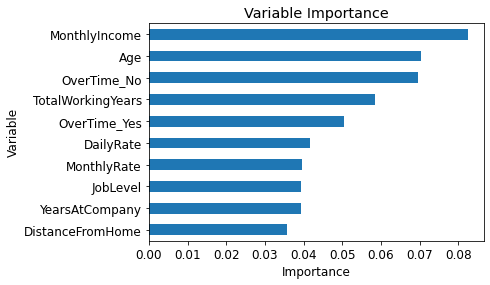

<Figure size 864x864 with 0 Axes>

In [79]:
# Plot variable importance from the random forest
import matplotlib.pyplot as plt

feature_names = rfecv.get_feature_names_out().tolist()
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.nlargest(10).plot(kind='barh').invert_yaxis()
# increase the font size
plt.rcParams.update({'font.size': 12})
# add title and labels
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Variable')
# increase the size of the plot
plt.figure(figsize=(12, 12))
# show the plot
plt.show()

## Modelo: clasificación binaria con grid search y cross validation

In [85]:
# Create a pipeline to search for the best parameters
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Create a dictionary of parameters to try
parameters = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth': [4, 6, 8]
}

# Create a grid search object
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [4, 6, 8],
                         'classifier__max_features': ['auto', 'sqrt', 'log2'],
                         'classifier__n_estimators': [100, 200, 300]},
             verbose=1)

In [86]:
# View the best parameters
print(grid_search.best_params_)

# View the best score
print(grid_search.best_score_)

{'classifier__max_depth': 6, 'classifier__max_features': 'auto', 'classifier__n_estimators': 200}
0.914179104477612


In [87]:
# View the complete results
print(grid_search.cv_results_)

{'mean_fit_time': array([0.34231682, 0.67154651, 0.83358779, 0.26237621, 0.49916162,
       0.74439015, 0.23897657, 0.47230444, 0.70314393, 0.27398825,
       0.54776964, 0.84446177, 0.28304982, 0.55912991, 0.82035432,
       0.24905   , 0.49225535, 0.76536479, 0.2885941 , 0.57743239,
       0.85332322, 0.28601804, 0.57421789, 0.88161144, 0.26543608,
       0.55064425, 0.67340431]), 'std_fit_time': array([0.01860156, 0.01174848, 0.08274671, 0.01475138, 0.05216722,
       0.00470659, 0.00370875, 0.00493905, 0.00314049, 0.00635483,
       0.00869637, 0.00913752, 0.00424689, 0.00525096, 0.00619515,
       0.00718347, 0.00711374, 0.00668532, 0.0078021 , 0.00892589,
       0.01087157, 0.00081788, 0.01396143, 0.03184875, 0.00443457,
       0.00838123, 0.05928673]), 'mean_score_time': array([0.03715858, 0.03939457, 0.05794711, 0.02010798, 0.04157324,
       0.05063424, 0.01922545, 0.0365664 , 0.04706054, 0.01930203,
       0.03645439, 0.05746503, 0.0190134 , 0.03789425, 0.06216202,
       0.0

In [88]:
# View the mean test score for each parameter combination
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.902985 (0.006244) with: {'classifier__max_depth': 4, 'classifier__max_features': 'auto', 'classifier__n_estimators': 100}
0.905224 (0.008377) with: {'classifier__max_depth': 4, 'classifier__max_features': 'auto', 'classifier__n_estimators': 200}
0.903731 (0.004351) with: {'classifier__max_depth': 4, 'classifier__max_features': 'auto', 'classifier__n_estimators': 300}
0.903731 (0.004351) with: {'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}
0.904478 (0.007312) with: {'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 200}
0.901493 (0.007312) with: {'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 300}
0.899254 (0.005277) with: {'classifier__max_depth': 4, 'classifier__max_features': 'log2', 'classifier__n_estimators': 100}
0.900746 (0.005061) with: {'classifier__max_depth': 4, 'classifier__max_features': 'log2', 'classifier__n_estimators': 200}
0.900746

In [89]:
# View the best model
print(grid_search.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=6, n_estimators=200))])


In [90]:
# Predict on the test set
y_pred = grid_search.predict(X_test)

In [91]:
# Evaluate the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8988095238095238
